In [101]:
import numpy as np
import csv


In [102]:
import matplotlib.pyplot as plt

In [103]:
import pandas as pd



In [104]:
import seaborn as sn

## 0. Data loading <h1 id ='id2'></h1>

##### the file path is easy changable 

In [105]:
FILE_PATH = '/Volumes/ExternalSSDForMac/AITLecture/CSforDSAIAUG22/codealongcsfordsaiAti/house_rent_data.csv'
df = pd.read_csv(FILE_PATH)

In [106]:
df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [107]:
df.info()
# type object > change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   int64  
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4739 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 445.1+ KB


### EDA

In [108]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4739.000000
mean,2.083860,3.499345e+04,967.490729,1.967293
std,0.832256,7.810641e+04,634.202328,0.884405
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [109]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             7
Point of Contact     0
dtype: int64

In [110]:
df["City"].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

#### rename the column for easy calling

In [111]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [112]:
df = df.rename(columns = {'Area Type':'areatype','Area Locality':'area_local','Furnishing Status':'furnishingstatus',
'Tenant Preferred':'Tenant'})

#### remove too much rent row

In [113]:
a = df[df.Rent >900000]
a = [827,1001,1837]
df = df.drop(a,axis=0)


In [114]:
df.head()

,Posted On,BHK,Rent,Size,Floor,areatype,area_local,City,furnishingstatus,Tenant,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


### observe what affect the Rent

<Figure size 1080x360 with 0 Axes>

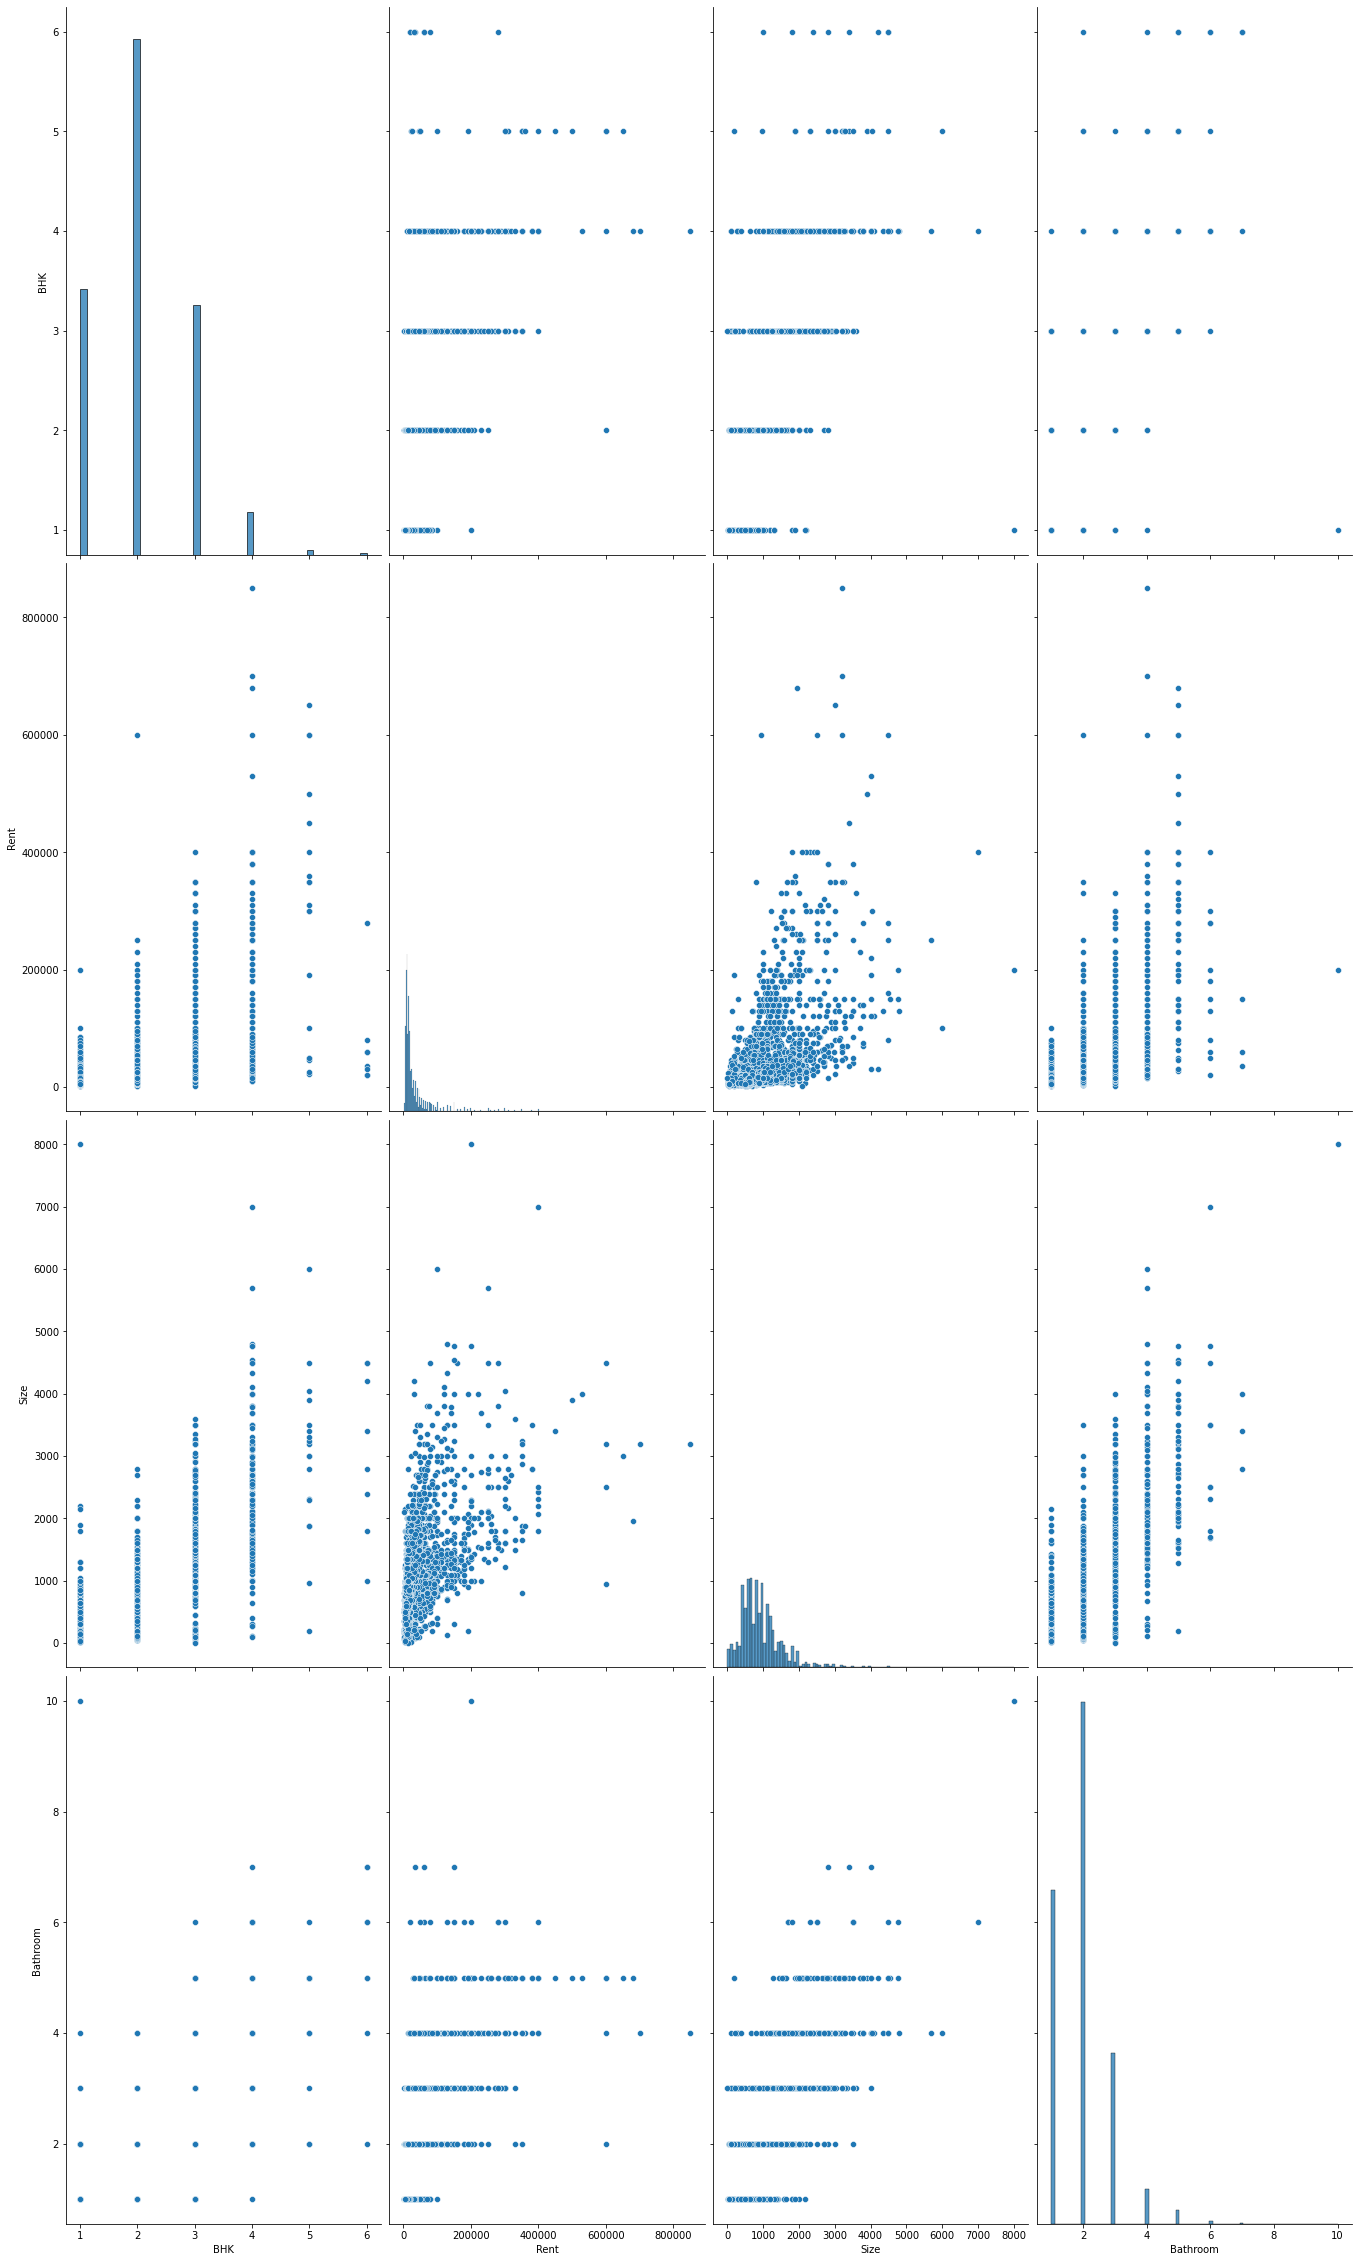

In [115]:
plt.figure(figsize=(15, 5))

sn.pairplot(df, height=8, aspect=0.6)

### In term of values

<AxesSubplot:>

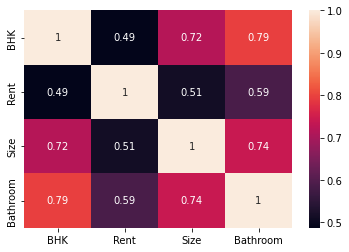

In [116]:
sn.heatmap(df.corr(),annot = True)

In [117]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'areatype', 'area_local',
       'City', 'furnishingstatus', 'Tenant', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [118]:
print(df.City.unique())
print(df.area_local.unique())
print(df.areatype.unique())
print(df.Tenant.unique())
print(df.furnishingstatus.unique())

['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']
['Bandel' 'Phool Bagan, Kankurgachi' 'Salt Lake City Sector 2' ...
 'BN Reddy Nagar' 'Godavari Homes, Quthbullapur' 'Manikonda, Hyderabad']
['Super Area' 'Carpet Area' 'Built Area']
['Bachelors/Family' 'Bachelors' 'Family']
['Unfurnished' 'Semi-Furnished' 'Furnished']


#### checking the behaviour of dataset at single parameter

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='furnishingstatus', ylabel='count'>

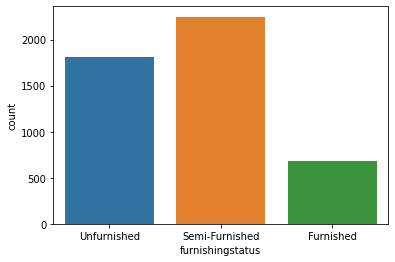

In [119]:
sn.countplot(df.furnishingstatus)


/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenant', ylabel='count'>

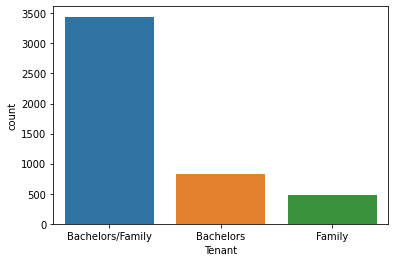

In [120]:
sn.countplot(df.Tenant)


/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='areatype', ylabel='count'>

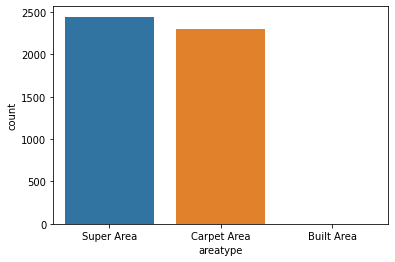

In [121]:
sn.countplot(df.areatype)

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

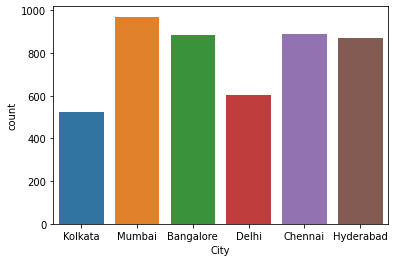

In [122]:
sn.countplot(df.City)

In [123]:
# change to box plot

<AxesSubplot:xlabel='City', ylabel='Rent'>

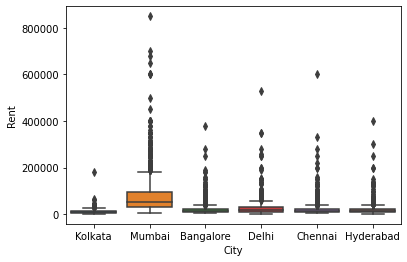

In [124]:
sn.boxplot(x=df.City,y=df.Rent)

City -> mumbai and not mumbai

<AxesSubplot:xlabel='areatype', ylabel='Rent'>

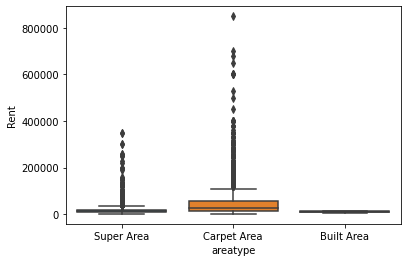

In [125]:
sn.boxplot(x = df.areatype,y = df.Rent)

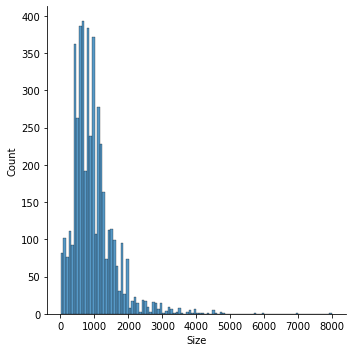

In [126]:
sn.displot(df.Size)

In [127]:

# 

### Conclude EDA
    - Bathroom > size > BHK
    - Potential after preprocessing -> City,Tenant,furnishingstatus
    -  <b>Form a fast track observed</b>

## Part 3. Feature Extraction


In [128]:
df_use = df[['Bathroom','Size','BHK']]
y = df[['Rent']]

In [129]:
# df_use
X = df_use

In [130]:
from sklearn.model_selection import train_test_split


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [132]:
print(f'X of traing data set\n{X_train[:5]}')
print(f'y of traing data set\n{y_train[:5]}')
print('\n')
print(f'X of testing data set\n{X_test[:5]}')
print(f'y of testing data set\n{y_test[:5]}')

X of traing data set
      Bathroom  Size  BHK
4501       3.0  1550    3
3907       2.0  1100    2
58         2.0   650    2
76         1.0   500    2
796        1.0   225    1
y of traing data set
       Rent
4501  37000
3907   9000
58     7000
76     5500
796   18500


X of testing data set
      Bathroom  Size  BHK
2577       4.0  2300    4
3604       1.0   550    1
1960       1.0   810    2
429        1.0   450    2
465        1.0   750    2
y of testing data set
        Rent
2577  200000
3604    9000
1960   10000
429     5500
465     7000


In [133]:
print(f'train size {X_train.shape}\n test size {X_test.shape}')

train size (3320, 3)
 test size (1423, 3)


In [134]:
X_train.isna().sum()

Bathroom    5
Size        0
BHK         0
dtype: int64

In [135]:
X_test.isna().sum()

Bathroom    2
Size        0
BHK         0
dtype: int64

No NaN on y

In [136]:
X_train.Bathroom.describe()

count    3315.000000
mean        1.965309
std         0.872536
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: Bathroom, dtype: float64

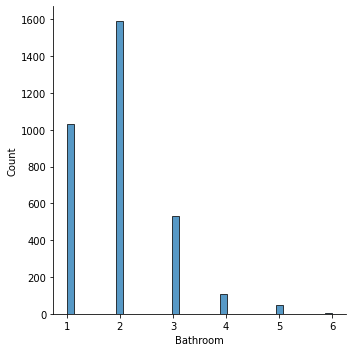

In [137]:
sn.displot(X_train.Bathroom)


In [138]:
X_train_temp = X_train.Bathroom.fillna(X_train.Bathroom.median())

In [139]:
X_train_temp.info()
X_train.Bathroom = X_train_temp.Bathroom

<class 'pandas.core.series.Series'>
Int64Index: 3320 entries, 4501 to 861
Series name: Bathroom
Non-Null Count  Dtype  
--------------  -----  
3320 non-null   float64
dtypes: float64(1)
memory usage: 51.9 KB


AttributeError: 'Series' object has no attribute 'Bathroom'

In [140]:
X_test.Bathroom.describe()

count    1421.000000
mean        1.968332
std         0.909099
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        10.000000
Name: Bathroom, dtype: float64

In [141]:
## do value_counts()


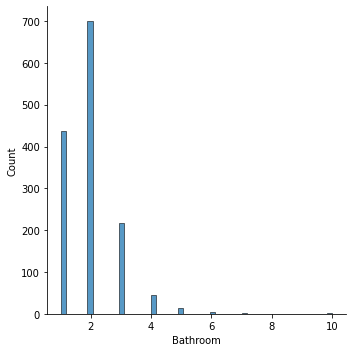

In [142]:
sn.displot(X_test.Bathroom)


In [143]:
X_test.Bathroom = X_test.Bathroom.fillna(X_test.Bathroom.median())

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
sc = StandardScaler()

In [146]:
X_train[:5]

,Bathroom,Size,BHK
4501,3.0,1550,3
3907,2.0,1100,2
58,2.0,650,2
76,1.0,500,2
796,1.0,225,1


In [147]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [148]:
X_train[:5]

array([[ 1.1860222 ,  0.92991929,  1.08693371],
       [ 0.03976459,  0.21053499, -0.10836934],
       [ 0.03976459, -0.50884931, -0.10836934],
       [-1.10649302, -0.74864407, -0.10836934],
       [-1.10649302, -1.18826781, -1.30367239]])

In [149]:
X_test[:5]

array([[ 2.33227982,  2.12889312,  2.28223676],
       [-1.10649302, -0.66871249, -1.30367239],
       [-1.10649302, -0.25306822, -0.10836934],
       [-1.10649302, -0.82857566, -0.10836934],
       [-1.10649302, -0.34898613, -0.10836934]])

In [151]:
np.mean(X_test[:,0])

0.0035161090071993005

ONE hot endcoding
pd.get dummy

[hi](#id1)